<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/3%EC%9E%A5/k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

회귀는 두 변수 사이의 상관관계를 분석하는 방법이라한다.

In [ ]:
#k최근접이웃회귀도 예측하려는 샘플에 가장 가까운 k개 샘플을 선택해서 그 수치들의 평균을 구한다.

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

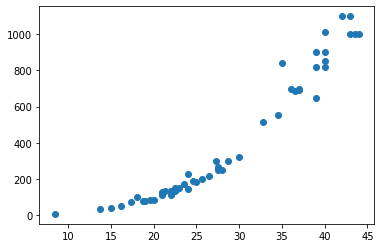

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
#사이킷런에 사용할 훈련세트는 2차원 배열이어야한다. 근데 perch_length가 1차원 배열이라 train_test_split으로 한 것도 1차원
#특성을 한개만 사용하므로 (농어의 길이: 특성, 타겟: 무게)
#2차원 배열을 수동으로 만들어야한
train_input=train_input.reshape(-1,1) # -1은 나머지 원소 개수로 모두 채우라는 것 1은 두번쨰 크기를 1로 하는 것
test_input=test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print(knr.score(test_input, test_target))
#이 점수가 벼 ㄹ의미가 없는게, 회귀에서 정확한 정답을 맞추는 개수의 비율은 중요하지 않음
#왜냐면 회귀에서 정확한 점수를 맞추는 것은 불가능하기 때문이다. 그래서 회귀는 결정계수를 이용하여 평가한다.


0.9928094061010639


In [ ]:
from sklearn.metrics import mean_absolute_error #타깃과 예측의 절댓값 오차를 평균하여 반환한다.

test_prediction = knr.predict(test_input)
mae=mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099255


In [ ]:
#훈련세트에서 점수 높은데 테스트세트에서 점수 낮으면 과대적합되었다는 것. 
#두 점수가 모두 낮거나 테스트 세트의 점수가 더 높으면 과소적합 되어있는 것.

#위의 모델은 과소적합입니다! 훈련세트보다 테스트 점수가 높기 때문입니도
#그럼 문제를 조금 더 복잡하게 만들면된다. k의 개수를 줄이면 된다. 이러면 국지적인 패턴에 민감해지고
#이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다. 기본값은 k=5

knr.n_neighbors=3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.974645996398761


In [ ]:
#두 점수의 차이가 크지 않으니 적합함을 확인할 수 있다.